requires python 3.8

In [1]:
import matplotlib
%matplotlib inline

In [2]:
# these are the environment variables required to access Mortar
import os
os.environ["MORTARDATA_S3_REGION"] = "us-east-2"
os.environ["MORTARDATA_S3_BUCKET"] = "mortar-data-parquet"
os.environ["MORTARDATA_QUERY_ENDPOINT"] = "https://xm22xldyclv3vmindlc6v7bsya0gbdui.lambda-url.us-east-1.on.aws/"
os.environ["MORTARDATA_SITES_ENDPOINT"] = "https://fym4sqrcwqxrz2wmgxdszyre2i0tnrld.lambda-url.us-east-1.on.aws/"

In [3]:
from mortardata import Client

# connect client
c = Client()

# list all sites in Mortar
print(c.sites)

2023-11-24 10:12:51.052 | INFO     | mortardata:__init__:47 - Connected to Parquet dataset
2023-11-24 10:12:52.084 | INFO     | mortardata:sites:76 - Fetched 45 sites in 1.03sec


['urn:bldg31#', 'urn:bldg38#', 'urn:bldg4#', 'urn:bldg32#', 'urn:bldg41#', 'urn:bldg23#', 'urn:bldg21#', 'urn:bldg3#', 'urn:bldg6#', 'urn:bldg5#', 'urn:smc#', 'urn:bldg43#', 'urn:bldg28#', 'urn:bldg13#', 'urn:bldg18#', 'urn:bldg22#', 'urn:bldg15#', 'urn:bldg35#', 'urn:bldg20#', 'urn:bldg16#', 'urn:bldg17#', 'urn:bldg34#', 'urn:bldg7#', 'urn:bldg40#', 'urn:bldg30#', 'urn:bldg12#', 'urn:bldg19#', 'urn:bldg25#', 'urn:bldg42#', 'urn:bldg14#', 'urn:bldg36#', 'urn:bldg27#', 'urn:bldg29#', 'urn:bldg44#', 'urn:bldg26#', 'urn:bldg39#', 'urn:bldg9#', 'urn:bldg37#', 'urn:bldg24#', 'urn:bldg2#', 'urn:bldg8#', 'urn:bldg10#', 'urn:bldg1#', 'urn:bldg33#', 'urn:bldg11#']


In [4]:
# queries to retrieve the timeseries IDs. You *need* to access the ref:hasExternalReference/ref:hasTimeseriesId
# property of a Point and include the id in your output for the client to find the data
vav_points = """
PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ref: <https://brickschema.org/schema/Brick/ref#>
SELECT ?point ?equip ?id WHERE {
    ?point rdf:type/rdfs:subClassOf* brick:Air_Temperature_Sensor .
    ?point brick:isPointOf ?equip .
    ?equip rdf:type/rdfs:subClassOf* brick:VAV .
    ?point ref:hasExternalReference/ref:hasTimeseriesId ?id .
}"""
# get metadata for first 20 sites
df = c.sparql(vav_points, sites=c.sites[:20]) 
# most operations return dataframes
df.to_csv("vav_points.csv")
df.head()

2023-11-24 10:12:52.100 | INFO     | mortardata:sparql:94 - Dispatching parallel SPARQL queries for 20 sites
2023-11-24 10:12:56.686 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:56.693 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:57.039 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:57.041 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:57.070 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:57.102 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:57.137 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:57.309 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:12:57.312 | INFO     | mortardata:sparql:107 - Fetched 2 SPARQL rows
2023-11-24 10:12:57.313 | INFO     | mortardata:sparql:107 - Fetched 20 SPARQL rows
2023-11-24 10:12:57.400 | INFO     | mortardata:sparql:107 -

,point,equip,id
0,http://buildsys.org/ontologies/bldg22#bldg22.Z...,http://buildsys.org/ontologies/bldg22#VAVRM060,5f3036cd-41d6-4c78-8dfa-b940eb217b80
1,http://buildsys.org/ontologies/bldg22#bldg22.Z...,http://buildsys.org/ontologies/bldg22#VAVRM060...,34ee6d12-8882-4159-8a04-b43a8ba40904
0,http://buildsys.org/ontologies/bldg20#bldg20.Z...,http://buildsys.org/ontologies/bldg20#VAVRM141,6feb9c61-f2ab-42d9-9be3-629ad79b4bcf
1,http://buildsys.org/ontologies/bldg20#bldg20.Z...,http://buildsys.org/ontologies/bldg20#VAVRM151,833e6ca6-bff7-4268-ad77-d97ac20a88ff
2,http://buildsys.org/ontologies/bldg20#bldg20.Z...,http://buildsys.org/ontologies/bldg20#VAVRM146...,718e535b-a959-49c5-8f4d-3baa0671ce75


In [5]:
# get timeseries data into a dataframe for 2 sites, maximum of 1 million points for January 2016 (feel free to remove limit)
df = c.data_sparql(vav_points, start="2016-01-01", end="2016-04-01", sites=['urn:bldg2#','urn:bldg5#'], limit=1e6)
df.head()

2023-11-24 10:12:58.847 | INFO     | mortardata:sparql:94 - Dispatching parallel SPARQL queries for 2 sites
2023-11-24 10:13:03.948 | INFO     | mortardata:sparql:107 - Fetched 0 SPARQL rows
2023-11-24 10:13:04.691 | INFO     | mortardata:sparql:107 - Fetched 121 SPARQL rows
2023-11-24 10:13:04.697 | INFO     | mortardata:_to_batches:143 - Fetching data for ['urn:bldg2#', 'urn:bldg5#'] with start=Timestamp('2016-01-01 00:00:00') end=Timestamp('2016-04-01 00:00:00') (limit=1000000.0)


['bldg2', 'bldg5']


,value,collection,uri
time,,,
2016-03-09 05:45:00+00:00,70.0,bldg5,http://buildsys.org/ontologies/bldg5#bldg5.ZON...
2016-03-09 06:00:00+00:00,70.0,bldg5,http://buildsys.org/ontologies/bldg5#bldg5.ZON...
2016-03-09 06:15:00+00:00,70.0,bldg5,http://buildsys.org/ontologies/bldg5#bldg5.ZON...
2016-03-09 06:30:00+00:00,70.0,bldg5,http://buildsys.org/ontologies/bldg5#bldg5.ZON...
2016-03-09 06:45:00+00:00,70.0,bldg5,http://buildsys.org/ontologies/bldg5#bldg5.ZON...


In [6]:
df.describe()

,value
count,257205.000000
mean,71.534484
std,3.017607
min,0.000000
25%,70.000000
50%,71.000000
75%,74.000000
max,85.250000


<Axes: xlabel='time'>

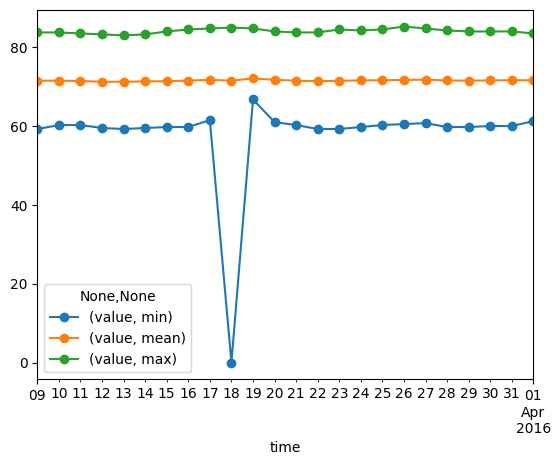

In [7]:
df.resample('24H').agg({'value': ['min','mean','max']}).plot(style='-o')